In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [30]:
import pandas as pd
import numpy as np


df = pd.read_csv(
    'data/processing/data.csv',
    low_memory=False,
    parse_dates=['issue_date']
)

df.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,revol_bal,total_pymnt
count,2.260668e+06,2.260668e+06,2.260668e+06,2.260664e+06,2.258957e+06,2.260668e+06,2.260668e+06
mean,1.504693e+04,1.504166e+04,1.309291e+01,7.799243e+04,1.882420e+01,1.665846e+04,1.182403e+04
std,9.190245e+03,9.188413e+03,4.832114e+00,1.126962e+05,1.418333e+01,2.294831e+04,9.889599e+03
min,5.000000e+02,5.000000e+02,5.310000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.490000e+00,4.600000e+04,1.189000e+01,5.950000e+03,4.272580e+03
50%,1.290000e+04,1.287500e+04,1.262000e+01,6.500000e+04,1.784000e+01,1.132400e+04,9.060870e+03
75%,2.000000e+04,2.000000e+04,1.599000e+01,9.300000e+04,2.449000e+01,2.024600e+04,1.670797e+04
max,4.000000e+04,4.000000e+04,3.099000e+01,1.100000e+08,9.990000e+02,2.904836e+06,6.329688e+04


In [95]:
df.dtypes
df['funded_amnt'] = df.funded_amnt.apply(float)
df

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_date,max_date,nb_months,months
0,2500,2500.0,36 months,13.56,C,55000.0,Dec-2018,Current,18.24,4341,167.020000,2018-12-01,2018-12-01,0,0
1,30000,30000.0,60 months,18.94,D,90000.0,Dec-2018,Current,26.52,12315,1507.110000,2018-12-01,2018-12-01,0,0
2,5000,5000.0,36 months,17.97,D,59280.0,Dec-2018,Current,10.51,4599,353.890000,2018-12-01,2018-12-01,0,0
3,4000,4000.0,36 months,18.94,D,92000.0,Dec-2018,Current,16.74,5468,286.710000,2018-12-01,2018-12-01,0,0
4,30000,30000.0,60 months,16.14,C,57250.0,Dec-2018,Current,26.35,829,1423.210000,2018-12-01,2018-12-01,0,0
5,5550,5550.0,36 months,15.02,C,152500.0,Dec-2018,Current,37.94,53854,377.950000,2018-12-01,2018-12-01,0,0
6,2000,2000.0,36 months,17.97,D,51000.0,Dec-2018,Current,2.40,0,141.560000,2018-12-01,2018-12-01,0,0
7,6000,6000.0,36 months,13.56,C,65000.0,Dec-2018,Current,30.10,38476,201.530000,2018-12-01,2018-12-01,0,0
8,5000,5000.0,36 months,17.97,D,53580.0,Dec-2018,Current,21.16,8018,353.890000,2018-12-01,2018-12-01,0,0
9,6000,6000.0,36 months,14.47,C,300000.0,Dec-2018,Current,17.43,65950,405.640000,2018-12-01,2018-12-01,0,0


In [108]:
df['tot_o_funded'] = (df['total_pymnt'] / df['funded_amnt'])

# df['annual_rate_return'] = (df.tot_o_funded)^(1/3) - 1.0

df['annual_rate_return'] = (np.power(df['total_pymnt'] / df['funded_amnt'], 1/3) - 1.0)

df

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_date,max_date,nb_months,months,tot_o_funded,annual_rate_return
0,2500,2500.0,36 months,13.56,C,55000.0,Dec-2018,Current,18.24,4341,167.020000,2018-12-01,2018-12-01,0,0,0.066808,-0.594234
1,30000,30000.0,60 months,18.94,D,90000.0,Dec-2018,Current,26.52,12315,1507.110000,2018-12-01,2018-12-01,0,0,0.050237,-0.631016
2,5000,5000.0,36 months,17.97,D,59280.0,Dec-2018,Current,10.51,4599,353.890000,2018-12-01,2018-12-01,0,0,0.070778,-0.586350
3,4000,4000.0,36 months,18.94,D,92000.0,Dec-2018,Current,16.74,5468,286.710000,2018-12-01,2018-12-01,0,0,0.071677,-0.584605
4,30000,30000.0,60 months,16.14,C,57250.0,Dec-2018,Current,26.35,829,1423.210000,2018-12-01,2018-12-01,0,0,0.047440,-0.637994
5,5550,5550.0,36 months,15.02,C,152500.0,Dec-2018,Current,37.94,53854,377.950000,2018-12-01,2018-12-01,0,0,0.068099,-0.591636
6,2000,2000.0,36 months,17.97,D,51000.0,Dec-2018,Current,2.40,0,141.560000,2018-12-01,2018-12-01,0,0,0.070780,-0.586346
7,6000,6000.0,36 months,13.56,C,65000.0,Dec-2018,Current,30.10,38476,201.530000,2018-12-01,2018-12-01,0,0,0.033588,-0.677352
8,5000,5000.0,36 months,17.97,D,53580.0,Dec-2018,Current,21.16,8018,353.890000,2018-12-01,2018-12-01,0,0,0.070778,-0.586350
9,6000,6000.0,36 months,14.47,C,300000.0,Dec-2018,Current,17.43,65950,405.640000,2018-12-01,2018-12-01,0,0,0.067607,-0.592623


In [31]:
from tools.helpers import read_json

data = read_json('project_config.json')

for col in data['keep_columns']:
    print(col)

loan_amnt
funded_amnt
term
int_rate
grade
annual_inc
issue_d
dti
revol_bal
total_pymnt
loan_status


In [32]:
# for col in data['keep_columns']:

#     df[col].hist()

df[''].hist()


KeyError: ''

In [ ]:
df.sort_values('issue_date', ascending=True).tail(20)

In [33]:
df['max_date'] = pd.to_datetime(df.issue_date.max())

df.dtypes


loan_amnt               int64
funded_amnt             int64
term                   object
int_rate              float64
grade                  object
annual_inc            float64
issue_d                object
loan_status            object
dti                   float64
revol_bal               int64
total_pymnt           float64
issue_date     datetime64[ns]
max_date       datetime64[ns]
dtype: object

In [41]:
import numpy as np

df['nb_months'] = ((df.max_date - df.issue_date)/np.timedelta64(1, 'M'))
df['nb_months'] = df['nb_months'].astype(int)

df['months'] = (
    (df.max_date - df.issue_date) / np.timedelta64(1, 'M')
).astype(int)

In [42]:
df

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_date,max_date,nb_months,months
0,2500,2500,36 months,13.56,C,55000.0,Dec-2018,Current,18.24,4341,167.020000,2018-12-01,2018-12-01,0,0
1,30000,30000,60 months,18.94,D,90000.0,Dec-2018,Current,26.52,12315,1507.110000,2018-12-01,2018-12-01,0,0
2,5000,5000,36 months,17.97,D,59280.0,Dec-2018,Current,10.51,4599,353.890000,2018-12-01,2018-12-01,0,0
3,4000,4000,36 months,18.94,D,92000.0,Dec-2018,Current,16.74,5468,286.710000,2018-12-01,2018-12-01,0,0
4,30000,30000,60 months,16.14,C,57250.0,Dec-2018,Current,26.35,829,1423.210000,2018-12-01,2018-12-01,0,0
5,5550,5550,36 months,15.02,C,152500.0,Dec-2018,Current,37.94,53854,377.950000,2018-12-01,2018-12-01,0,0
6,2000,2000,36 months,17.97,D,51000.0,Dec-2018,Current,2.40,0,141.560000,2018-12-01,2018-12-01,0,0
7,6000,6000,36 months,13.56,C,65000.0,Dec-2018,Current,30.10,38476,201.530000,2018-12-01,2018-12-01,0,0
8,5000,5000,36 months,17.97,D,53580.0,Dec-2018,Current,21.16,8018,353.890000,2018-12-01,2018-12-01,0,0
9,6000,6000,36 months,14.47,C,300000.0,Dec-2018,Current,17.43,65950,405.640000,2018-12-01,2018-12-01,0,0


In [43]:
dfs = df[~(df.months < 36)].copy()

In [46]:
dfs.months.max()

138

In [47]:
dfs.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [64]:
fully_paid_count = dfs.groupby(['loan_status']).term.count()['Fully Paid']



In [66]:
 dfs.groupby(['loan_status']).term.count()

loan_status
Charged Off                                            151667
Current                                                 58695
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             671159
In Grace Period                                           918
Late (16-30 days)                                         316
Late (31-120 days)                                       1936
Name: term, dtype: int64

In [67]:
pct_total_fully_paid = fully_paid_count / (len(dfs.index))

In [68]:
pct_total_fully_paid

0.7562866221941765

In [73]:
dfs['issue_year'] = dfs['issue_date'].dt.year

/Users/danielmsheehan/Documents/GitHub/assignment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
dfs

,loan_amnt,funded_amnt,term,int_rate,grade,annual_inc,issue_d,loan_status,dti,revol_bal,total_pymnt,issue_date,max_date,nb_months,months,issue_year
929649,24700,24700,36 months,11.99,C,65000.0,Dec-2015,Fully Paid,16.06,21470,25679.660000,2015-12-01,2018-12-01,36,36,2015
929650,35000,35000,60 months,12.88,C,106000.0,Dec-2015,Charged Off,17.36,39055,22208.070000,2015-12-01,2018-12-01,36,36,2015
929651,20000,20000,60 months,13.99,C,70000.0,Dec-2015,Charged Off,16.90,31200,15473.020000,2015-12-01,2018-12-01,36,36,2015
929652,20000,20000,36 months,12.88,C,145000.0,Dec-2015,Late (31-120 days),12.28,22551,23509.770000,2015-12-01,2018-12-01,36,36,2015
929653,14025,14025,60 months,18.49,D,39000.0,Dec-2015,Fully Paid,18.00,15646,16341.390792,2015-12-01,2018-12-01,36,36,2015
929654,16000,16000,60 months,8.49,B,62000.0,Dec-2015,Current,28.92,15763,12430.100000,2015-12-01,2018-12-01,36,36,2015
929655,17475,17475,36 months,13.99,C,39750.0,Dec-2015,Charged Off,23.58,10987,15399.650000,2015-12-01,2018-12-01,36,36,2015
929656,33600,33600,36 months,10.78,B,104000.0,Dec-2015,Fully Paid,14.01,28475,34309.150000,2015-12-01,2018-12-01,36,36,2015
929657,10400,10400,60 months,22.45,F,104433.0,Dec-2015,Fully Paid,25.37,21929,11740.500000,2015-12-01,2018-12-01,36,36,2015
929658,20000,20000,60 months,10.78,B,63000.0,Dec-2015,Fully Paid,10.78,7869,22705.924294,2015-12-01,2018-12-01,36,36,2015


In [86]:
dfs['year_grade'] = dfs.issue_year.apply(str) + '-' + dfs.grade
dfs['default'] = np.where(
    dfs['loan_status'] == 'Fully Paid', 
    0, 
    1,
)

/Users/danielmsheehan/Documents/GitHub/assignment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/danielmsheehan/Documents/GitHub/assignment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [111]:
dfsg = dfs.groupby(['year_grade','default']).count()

dfs['count'] = 1


# .apply(
#     lambda x: 100 * x / float(x.sum())
# )

/Users/danielmsheehan/Documents/GitHub/assignment/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
year_grade_default = dfs.groupby(['year_grade', 'default']).agg({'count': 'sum'})
year_grade = dfs.groupby(['year_grade']).agg({'count': 'sum'})

grouped_year_defaults = year_grade_default.div(year_grade, level='year_grade') * 100

In [136]:
grouped_year_defaults = grouped_year_defaults.reset_index()

In [159]:
defaults = grouped_year_defaults[(grouped_year_defaults['default'] == 1)]

defaults.set_index("year_grade", drop=True, inplace=True)

defaults_sort = defaults.sort_values(['default', 'count'], ascending=[False, False])

defaults_count = defaults_sort[['count']]

defaults_count_top_20 = defaults_count.head(20)

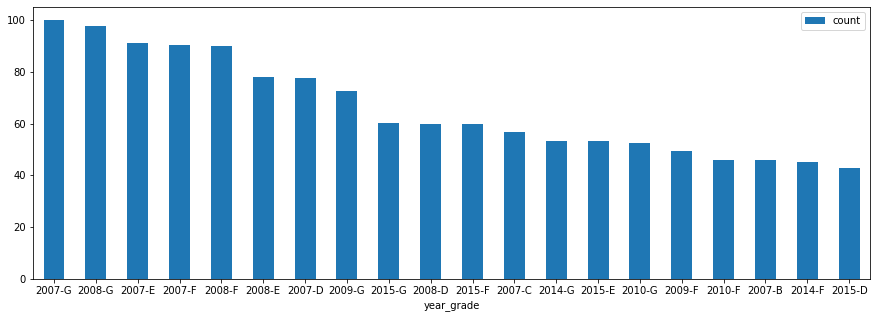

In [164]:
defaults_count_top_20.plot.bar(rot=0)